In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Data\\MeiData\\Udacity\\Data Scientist\\Blog Post\\Seattle\\clean_df.csv", index_col=0)
df.head()

,name,transit,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_since_date
0,Stylish Queen Anne Apartment,NaN,2011-08-11,within a few hours,96.0,100.0,f,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",...,10.0,9.0,10.0,f,moderate,f,f,2,4.07,2011-08-11
1,Bright & Airy Queen Anne Apartment,"Convenient bus stops are just down the block, ...",2013-02-21,within an hour,98.0,100.0,t,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",...,10.0,10.0,10.0,f,strict,t,t,6,1.48,2013-02-21
2,New Modern House-Amazing water view,A bus stop is just 2 blocks away. Easy bus a...,2014-06-12,within a few hours,67.0,100.0,f,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",...,10.0,10.0,10.0,f,strict,f,f,2,1.15,2014-06-12
3,Queen Anne Chateau,NaN,2013-11-06,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",...,NaN,NaN,NaN,f,flexible,f,f,1,NaN,2013-11-06
4,Charming craftsman 3 bdm house,The nearest public transit bus (D Line) is 2 b...,2011-11-29,within an hour,100.0,NaN,f,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",...,10.0,9.0,9.0,f,strict,f,f,1,0.89,2011-11-29


## Functions for plotting

In [3]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

# Training and Testing

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [4]:
y_data = df['price']

In [5]:
x_data=df[['bedrooms', 'accommodates', 'beds']]

In [6]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 573
number of training samples: 3245


In [10]:
poly=LinearRegression()

Text(3, 0.75, 'Maximum R^2 ')

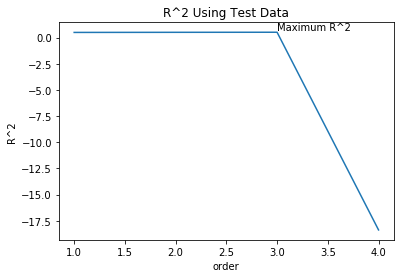

In [11]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train)
    
    x_test_pr = pr.fit_transform(x_test)    
    
    poly.fit(x_train_pr, y_train)
    
    Rsqu_test.append(poly.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

R^2 decreases dramatically when order is larger than 3. Therefore, I set polynomial order as 3 to create the best model.

In [9]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [10]:
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

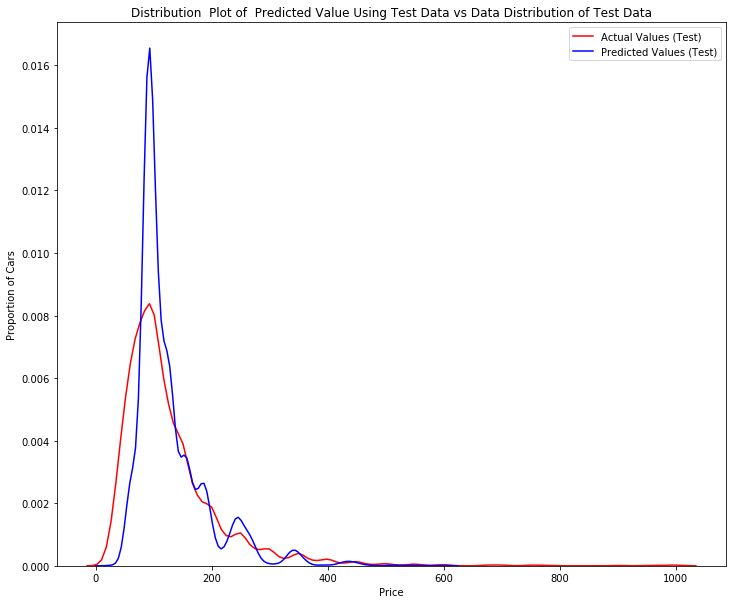

In [11]:
yhat_train=poly.predict(x_train_pr)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_train, yhat_train, "Actual Values (Test)", "Predicted Values (Test)", Title)

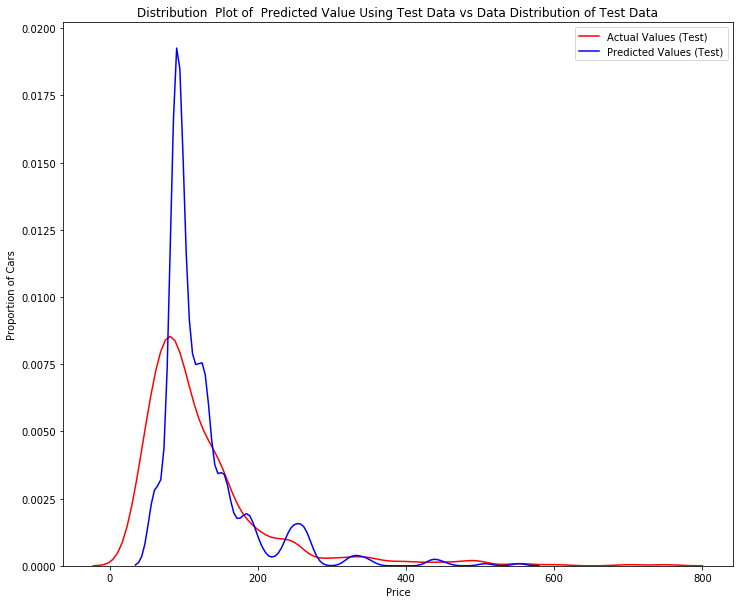

In [12]:
yhat_test=poly.predict(x_test_pr)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [13]:
r2_test = r2_score(y_test, yhat_test)
r2_test

0.5143739752707361

In [14]:
r2_train = r2_score(y_train, yhat_train)
r2_train

0.4916459543020859

# Conclusion
Testing data has slightly better R^2 than training data, which shows model fits well. Even though the overall R^2 (around 0.5) is very low. I will stop here now and choose this model to predict price.

#### Question 2. What is related to higher price?
The space size for every client is the most important features related to higher price, according to the linear prediction model.